In [2]:
import torch
from torchvision import datasets
from torchvision import transforms

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

###**Downloading Dataset**

In [3]:
# Get the MNIST train dataset
train_data = datasets.MNIST(root = ".",
                            train = True,
                            download = True,
                            transform = transforms.ToTensor())

test_data = datasets.MNIST(root = ".",
                           train = False,
                           download = True,
                           transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 57960429.00it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31349817.24it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31556645.87it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13294158.25it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# Data is in tuple form (image, label)
img = train_data[0][0]
label = train_data[0][1]
print(f'Image:\n{img}')
print(f'Label:\n{label}')

Image:
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [7]:
# Check out the shapes of our data
print(f'Image Shape: {img.shape} -> [color_channels, height, width]')
print(f'Label: {label}')

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Label: 5


In [8]:
# Get the class names from the dataset
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

###**Visualize different samples of the MNIST training dataset.**

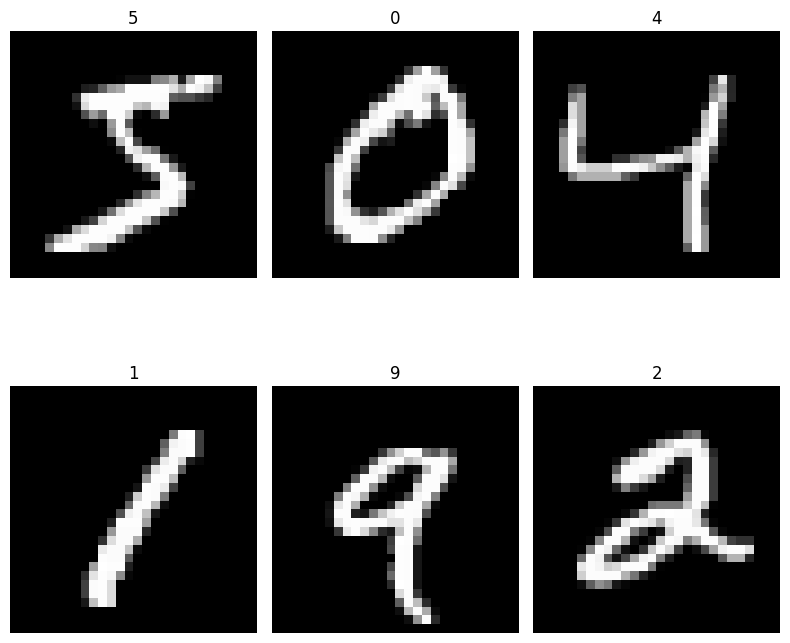

In [9]:
import matplotlib.pyplot as plt

num_images = 6
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(8, 8))

for i in range(num_images):
    img = train_data[i][0]
    img_squeeze = img.squeeze()
    label = train_data[i][1]

    # Create individual subplot for each image
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(img_squeeze, cmap='gray')
    plt.title(label)
    plt.axis(False)

plt.tight_layout()
plt.show()

###**Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.**

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = 32,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = 32,
                             shuffle = False)

In [11]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7905847cb3d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7905847cb3a0>)

In [12]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [13]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

##**Model Building**

In [14]:
from torch import nn

class ModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_unit: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_unit,
                  out_channels = hidden_unit,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_unit * 7 * 7,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [15]:
model_1 = ModelV1(input_shape=1,
                  hidden_unit=10,
                  output_shape = 10).to(device)

In [16]:
model_1

ModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [17]:
model_1.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0896, -0.0167, -0.2194],
                        [-0.0523,  0.2541,  0.0084],
                        [ 0.0280, -0.1814,  0.1315]]],
              
              
                      [[[ 0.0459,  0.1865,  0.0919],
                        [-0.3200,  0.1714, -0.1741],
                        [ 0.1696,  0.1979, -0.3270]]],
              
              
                      [[[ 0.0534, -0.1346,  0.1812],
                        [-0.2806,  0.0333,  0.3218],
                        [-0.1394,  0.1925,  0.2643]]],
              
              
                      [[[-0.1801,  0.0438, -0.0672],
                        [-0.1031, -0.2092,  0.2534],
                        [ 0.1913, -0.2010,  0.0583]]],
              
              
                      [[[-0.0803, -0.1428,  0.3118],
                        [-0.0973, -0.2937,  0.0880],
                        [ 0.2583,  0.0252, -0.1206]]],
              
              
      

In [18]:
# Try a dummy forward pass to see what shapes our data is
dummy_x = torch.rand(size = (1, 28, 28)).unsqueeze(dim = 0).to(device)
model_1(dummy_x)

tensor([[-0.0585,  0.0240,  0.0404, -0.0733, -0.0098, -0.0023,  0.0411,  0.0488,
          0.0515,  0.0086]], grad_fn=<AddmmBackward0>)

In [19]:
dummy_x_2 = torch.rand(size = [1, 10, 7, 7])
dummy_x_2.shape

torch.Size([1, 10, 7, 7])

In [20]:
flatten_layer = nn.Flatten()
flatten_layer(dummy_x_2).shape

torch.Size([1, 490])

In [21]:
%%time
from tqdm.auto import tqdm

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_1.train()

  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_1(X)

    # Loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Adjust the train loss to number of batches
  train_loss /= len(train_dataloader)

  ## Testing Loop
  test_loss_total = 0
  # Put the model into eval mode
  model_1.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_1(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.308 | Test loss: 0.067
Epoch: 1 | Loss: 0.073 | Test loss: 0.055
Epoch: 2 | Loss: 0.057 | Test loss: 0.042
Epoch: 3 | Loss: 0.049 | Test loss: 0.038
Epoch: 4 | Loss: 0.044 | Test loss: 0.038
CPU times: user 4min 40s, sys: 2.39 s, total: 4min 43s
Wall time: 4min 45s


###**Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.**

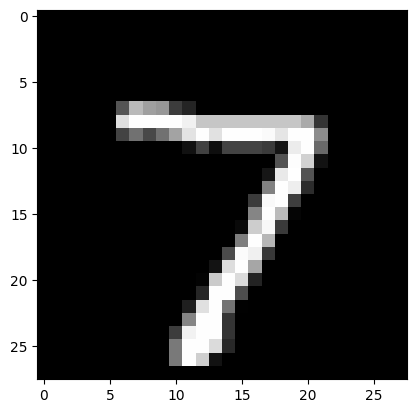

In [22]:
# Make predictions with the trained model
plt.imshow(test_data[0][0].squeeze(), cmap = 'gray')

In [23]:
# Logits -> Prediction probabilities -> Prediction labels
model_pred_logits = model_1(test_data[0][0].unsqueeze(dim = 0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim = 1)
model_pred_labels = torch.argmax(model_pred_probs, dim = 1)
model_pred_labels

tensor([7])

Text(0.5, 1.0, 'Prediction: 7')

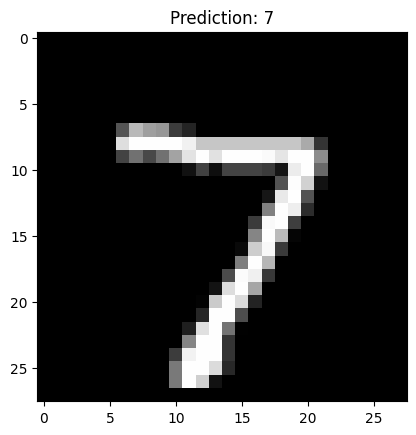

In [24]:
plt.imshow(test_data[0][0].squeeze(), cmap = 'gray')
plt.title(f'Prediction: {model_pred_labels.item()}')

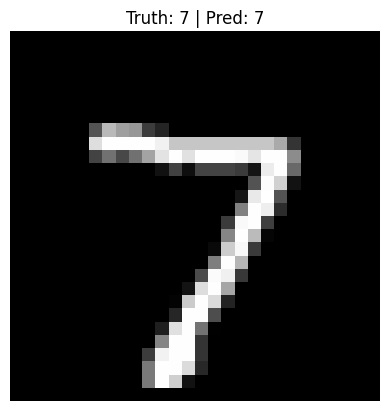

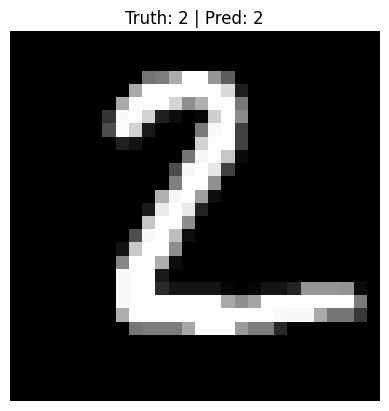

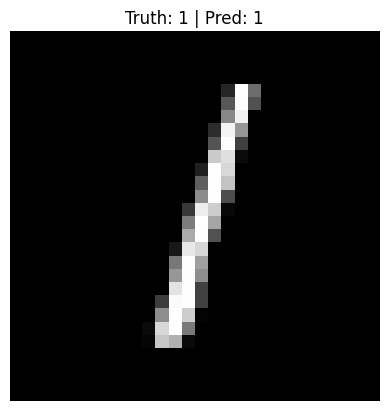

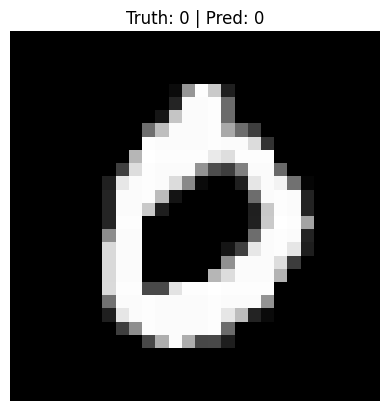

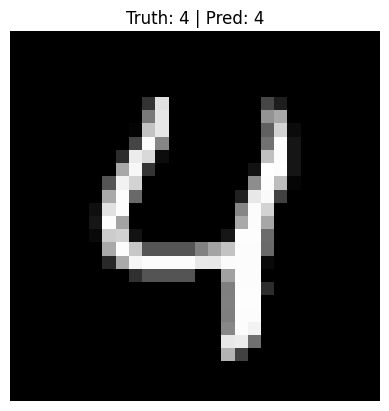

In [25]:
num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_1(img.unsqueeze(dim = 0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim = 1)
  model_pred_labels = torch.argmax(model_pred_probs, dim = 1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(f'Truth: {label} | Pred: {model_pred_labels.cpu().item()}')
  plt.axis(False);

###**Plot a confusion matrix comparing your model's predictions to the truth labels.**

In [28]:
!pip install -q torchmetrics -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [29]:
# Make predictions across all test data
from tqdm.auto import tqdm
model_1.eval()
y_preds = []
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred_logits = model_1(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(torch.softmax(y_pred_logits, dim = 1), dim = 1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_pred = torch.cat(y_preds).cpu()
len(y_pred)

0it [00:00, ?it/s]

10000

In [30]:
test_data.targets[:10], y_pred[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

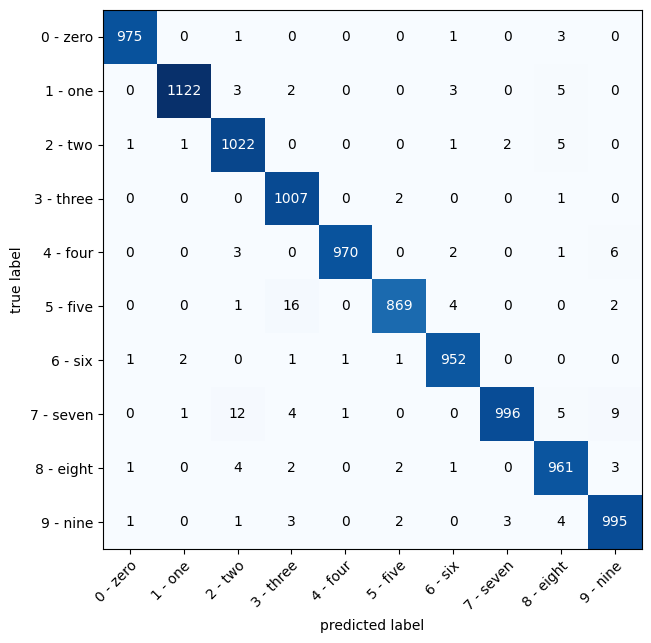

In [32]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task = 'multiclass', num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
)

###**Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?**

In [33]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [34]:
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 64,
                       kernel_size = 3,
                       stride = 2,
                       padding = 1)
print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


###**Trying FashionMNIST dataset on same model**

In [35]:
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root = '.',
                                            train = True,
                                            download = True,
                                            transform = transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root = '.',
                                           train = False,
                                           download = True,
                                           transform = transforms.ToTensor())
len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:01<00:00, 13372349.84it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 271230.78it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5076154.78it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 19347918.45it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [36]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [37]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size = 32,
                                            shuffle = True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size = 32,
                                           shuffle = False)
len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [38]:
model_2 = ModelV1(input_shape = 1,
                  hidden_unit = 10,
                  output_shape = 10).to(device)
model_2

ModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [39]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr = 0.01)

In [44]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task = 'multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

In [48]:
# Setup training/testing loop
epoch = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  ## Training
  model_2.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc  /= len(fashion_mnist_test_dataloader)

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_2(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)

    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.514 | Train acc: 4.89 | Test loss: 149.798 | Test acc: 0.83
Epoch: 1 | Train loss: 0.428 | Train acc: 5.07 | Test loss: 137.541 | Test acc: 0.84
Epoch: 2 | Train loss: 0.388 | Train acc: 5.16 | Test loss: 121.363 | Test acc: 0.86
Epoch: 3 | Train loss: 0.364 | Train acc: 5.21 | Test loss: 119.498 | Test acc: 0.87
Epoch: 4 | Train loss: 0.346 | Train acc: 5.26 | Test loss: 112.709 | Test acc: 0.87


In [53]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(fashion_mnist_test_dataloader):
    y_logits = model_2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim = 1)
    y_pred_labels = torch.argmax(y_pred_probs, dim = 1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu()
print(f'Predicted Values: {test_preds[:10]}')
print(f'Actual Values: {fashion_mnist_test.targets[:10]}')
len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

Predicted Values: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
Actual Values: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


10000

In [54]:
# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1264

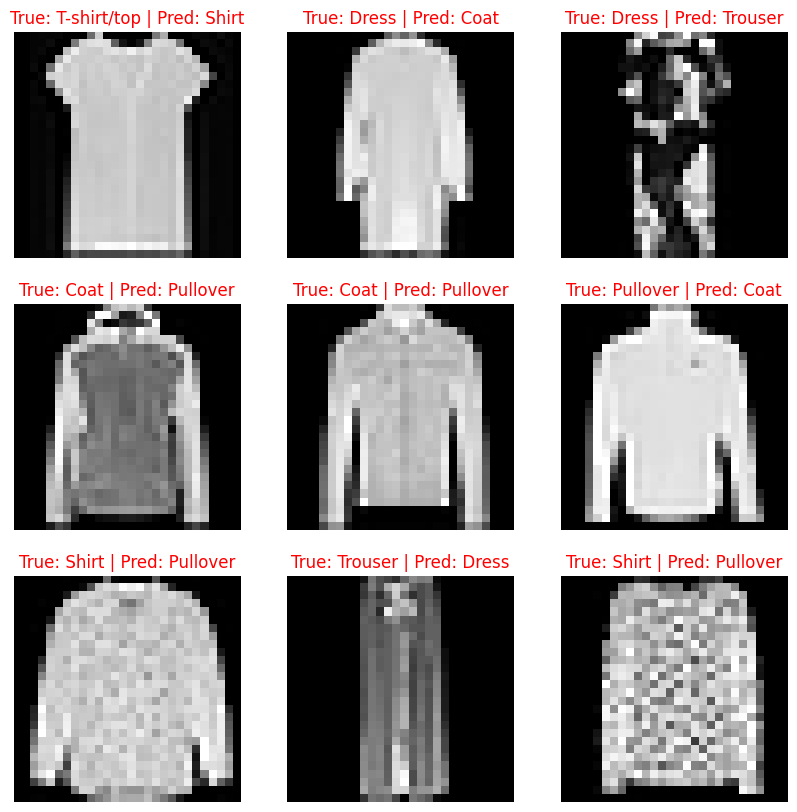

In [55]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_class_names[fashion_mnist_test[idx][1]]
  pred_label = fashion_mnist_class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);